<a href="https://colab.research.google.com/github/DorotaJanosz/machine-learning-bootcamp/blob/master/unsupervised/04_anomaly_detection/03_anomaly_detection_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fbprophet

###Import bibliotek

In [2]:
import fbprophet
import numpy as np
import pandas as pd
import plotly.express as px

np.random.seed(42)
fbprophet.__version__


'0.6'

###Załadowanie danych

In [3]:
df = pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ml-course/traffic.csv', parse_dates=['timestamp']) #parse_date tłumaczy komuterowi ze chcemy tą kolumne trakowtać w formacie daty a nie string
df.head()

timestamp    count
0 2018-09-25 14:01:00  182.478
1 2018-09-25 14:02:00  176.231
2 2018-09-25 14:03:00  183.917
3 2018-09-25 14:04:00  177.798
4 2018-09-25 14:05:00  165.469

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14398 entries, 0 to 14397
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  14398 non-null  datetime64[ns]
 1   count      14398 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 225.1 KB


###Wizualizacja danych

In [5]:
px.line(data_frame=df, x='timestamp', y='count', title='Anomally detection- Web traffic', width=950, height=500, template='plotly_dark', color_discrete_sequence=['#42f5d4'])

In [6]:
px.scatter(data_frame=df, x='timestamp', y='count', title='Anomally detection- Web traffic', width=950, height=500, template='plotly_dark', color_discrete_sequence=['#42f5d4'])

###Przygotowanie danych

In [7]:
#Danymi wejściowymi do bilioteki Prophet jest obiekt DataFrame. Wejściowe DataFrame składa sie z dwóch kolumn:
# ds - (datastamp, odpowiednio sformatowana kolumna np. YYYY-MM-DD or YYYY-MM-DD HH:MM:SS dla dokładnego czasu)
# y (koumna numeryczna, reprezentująca wartość którą chcemy przedstawić)

data = df.copy()
data.columns = ['ds', 'y']
data.head()

ds        y
0 2018-09-25 14:01:00  182.478
1 2018-09-25 14:02:00  176.231
2 2018-09-25 14:03:00  183.917
3 2018-09-25 14:04:00  177.798
4 2018-09-25 14:05:00  165.469

###Prophet - budowa modelu

In [8]:
from fbprophet import Prophet

Prophet?

In [9]:
model = Prophet(daily_seasonality=True, weekly_seasonality=False, yearly_seasonality=False, interval_width=0.99, changepoint_range=0.8 ) 
model.fit(data)
forecast = model.predict(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [10]:
forecast.head()

ds       trend  ...  multiplicative_terms_upper        yhat
0 2018-09-25 14:01:00  111.590807  ...                         0.0  160.468847
1 2018-09-25 14:02:00  111.592096  ...                         0.0  160.535097
2 2018-09-25 14:03:00  111.593385  ...                         0.0  160.597814
3 2018-09-25 14:04:00  111.594674  ...                         0.0  160.656972
4 2018-09-25 14:05:00  111.595963  ...                         0.0  160.712546

[5 rows x 16 columns]

In [11]:
forecast[['ds', 'trend','yhat', 'yhat_lower', 'yhat_upper']].head()  

ds       trend        yhat  yhat_lower  yhat_upper
0 2018-09-25 14:01:00  111.590807  160.468847  131.995359  187.892941
1 2018-09-25 14:02:00  111.592096  160.535097  132.195975  188.300353
2 2018-09-25 14:03:00  111.593385  160.597814  130.616869  190.458476
3 2018-09-25 14:04:00  111.594674  160.656972  130.634500  189.151290
4 2018-09-25 14:05:00  111.595963  160.712546  134.044897  191.106983

In [12]:
forecast['real'] = data['y']
forecast['anomaly'] = 1
forecast.loc[forecast['real'] < forecast['yhat_lower'], 'anomaly'] = -1
forecast.loc[forecast['real'] > forecast['yhat_upper'], 'anomaly'] = -1
forecast.head()

ds       trend  yhat_lower  ...        yhat     real  anomaly
0 2018-09-25 14:01:00  111.590807  131.995359  ...  160.468847  182.478        1
1 2018-09-25 14:02:00  111.592096  132.195975  ...  160.535097  176.231        1
2 2018-09-25 14:03:00  111.593385  130.616869  ...  160.597814  183.917        1
3 2018-09-25 14:04:00  111.594674  130.634500  ...  160.656972  177.798        1
4 2018-09-25 14:05:00  111.595963  134.044897  ...  160.712546  165.469        1

[5 rows x 18 columns]

###Wizualizacja dzialania modelu

In [13]:
px.scatter(forecast, x='ds', y='real', color='anomaly', title='Anomaly Detection in Time Series', template='plotly_dark', color_continuous_scale='Bluyl', width=950, height=500)

###Predykcja na podstawie modelu

In [14]:
future = model.make_future_dataframe(periods=1440, freq='Min') 
future 

ds
0     2018-09-25 14:01:00
1     2018-09-25 14:02:00
2     2018-09-25 14:03:00
3     2018-09-25 14:04:00
4     2018-09-25 14:05:00
...                   ...
15833 2018-10-06 13:54:00
15834 2018-10-06 13:55:00
15835 2018-10-06 13:56:00
15836 2018-10-06 13:57:00
15837 2018-10-06 13:58:00

[15838 rows x 1 columns]

In [15]:
forecast = model.predict(future) 
forecast[['ds', 'trend','yhat', 'yhat_lower', 'yhat_upper']].head() 

ds       trend        yhat  yhat_lower  yhat_upper
0 2018-09-25 14:01:00  111.590807  160.468847  131.312082  189.850604
1 2018-09-25 14:02:00  111.592096  160.535097  129.421602  191.157580
2 2018-09-25 14:03:00  111.593385  160.597814  134.892306  187.815847
3 2018-09-25 14:04:00  111.594674  160.656972  128.932573  187.992279
4 2018-09-25 14:05:00  111.595963  160.712546  132.099358  186.268129

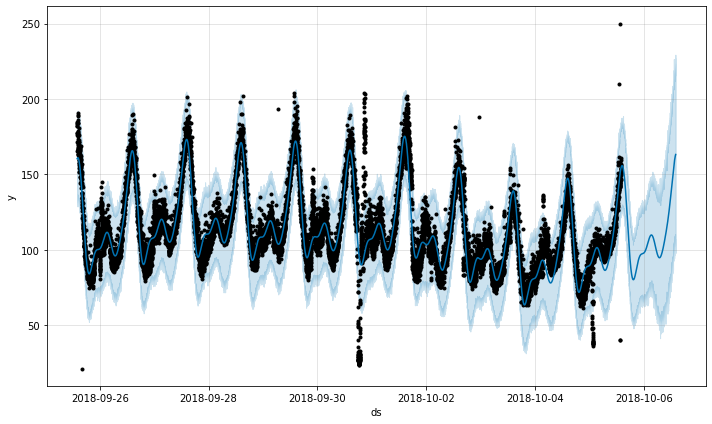

In [16]:
_ = model.plot(forecast) 

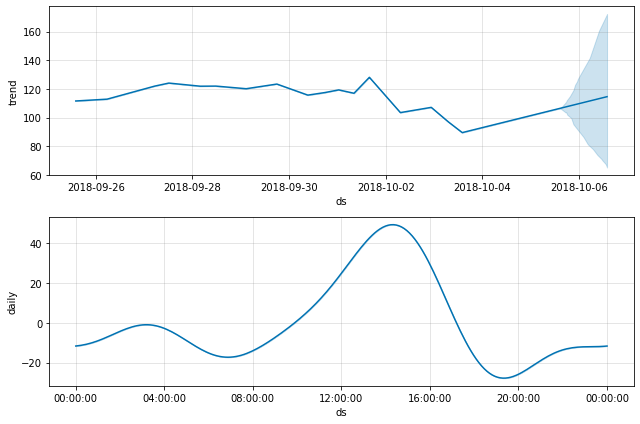

In [17]:
_ = model.plot_components(forecast) 

In [18]:
from fbprophet.plot import plot_plotly 

plot_plotly(model, forecast, xlabel='czas', ylabel='ruch webowy')

###Budowa modelu - wrzesień

In [28]:
data_sep = df[df['timestamp'].dt.month == 9]
data_sep.columns = ['ds', 'y']
data_sep.head()

ds        y
0 2018-09-25 14:01:00  182.478
1 2018-09-25 14:02:00  176.231
2 2018-09-25 14:03:00  183.917
3 2018-09-25 14:04:00  177.798
4 2018-09-25 14:05:00  165.469

In [21]:
model = Prophet(daily_seasonality=True, yearly_seasonality=False, weekly_seasonality=False,
                seasonality_mode='multiplicative', interval_width=0.99, changepoint_range=0.8)

In [22]:
model.fit(data_sep)
forecast = model.predict(data_sep)
forecast[['ds', 'trend','yhat', 'yhat_lower', 'yhat_upper']].head() 


ds       trend        yhat  yhat_lower  yhat_upper
0 2018-09-25 14:01:00  115.062749  165.385430  133.124001  196.853269
1 2018-09-25 14:02:00  115.047325  165.413429  136.196872  197.254107
2 2018-09-25 14:03:00  115.031901  165.437526  134.805692  194.074755
3 2018-09-25 14:04:00  115.016477  165.457699  131.679267  194.430000
4 2018-09-25 14:05:00  115.001052  165.473925  134.239091  194.587431

In [24]:
forecast['real'] = data['y']
forecast['anomaly'] = 1
forecast.loc[forecast['real'] < forecast['yhat_lower'], 'anomaly'] = -1
forecast.loc[forecast['real'] > forecast['yhat_upper'], 'anomaly'] = -1
forecast.head()

ds       trend  yhat_lower  ...        yhat     real  anomaly
0 2018-09-25 14:01:00  115.062749  133.124001  ...  165.385430  182.478        1
1 2018-09-25 14:02:00  115.047325  136.196872  ...  165.413429  176.231        1
2 2018-09-25 14:03:00  115.031901  134.805692  ...  165.437526  183.917        1
3 2018-09-25 14:04:00  115.016477  131.679267  ...  165.457699  177.798        1
4 2018-09-25 14:05:00  115.001052  134.239091  ...  165.473925  165.469        1

[5 rows x 18 columns]

In [26]:
px.scatter(forecast, x='ds', y='real', color='anomaly', title='Anomaly Detection in Time Series - September', template='plotly_dark', color_continuous_scale='Bluyl', width=950, height=500)

In [29]:
future = model.make_future_dataframe(periods=1440, freq='Min')
future

ds
0    2018-09-25 14:01:00
1    2018-09-25 14:02:00
2    2018-09-25 14:03:00
3    2018-09-25 14:04:00
4    2018-09-25 14:05:00
...                  ...
9234 2018-10-01 23:55:00
9235 2018-10-01 23:56:00
9236 2018-10-01 23:57:00
9237 2018-10-01 23:58:00
9238 2018-10-01 23:59:00

[9239 rows x 1 columns]

In [30]:
forecast = model.predict(future)
forecast[['ds', 'trend','yhat', 'yhat_lower', 'yhat_upper']].head() 

ds       trend        yhat  yhat_lower  yhat_upper
0 2018-09-25 14:01:00  115.062749  165.385430  130.861112  194.438392
1 2018-09-25 14:02:00  115.047325  165.413429  132.720953  193.648250
2 2018-09-25 14:03:00  115.031901  165.437526  136.717726  194.815045
3 2018-09-25 14:04:00  115.016477  165.457699  137.620600  198.313383
4 2018-09-25 14:05:00  115.001052  165.473925  135.543541  194.930614

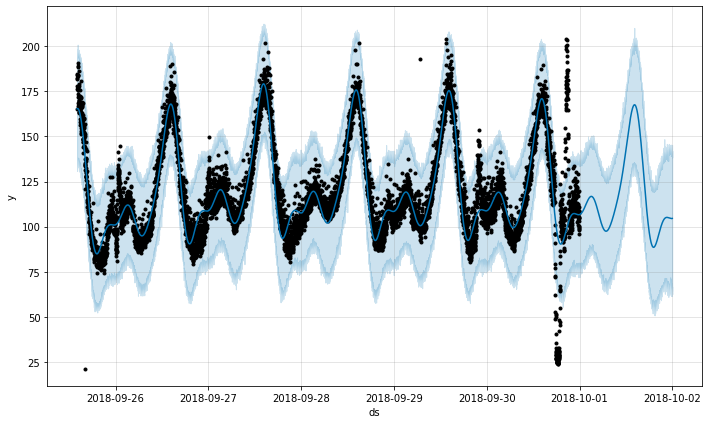

In [31]:
_ = model.plot(forecast)

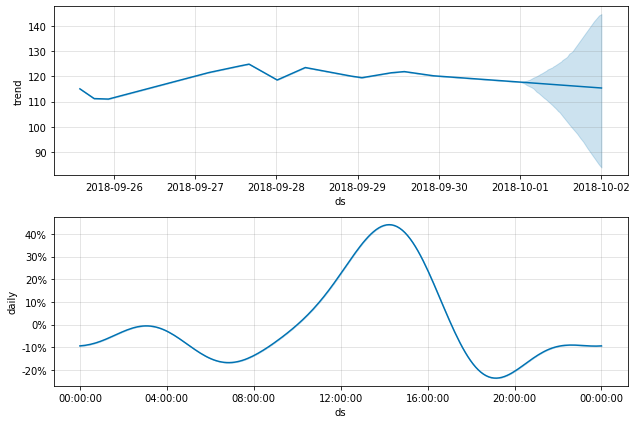

In [32]:
_ = model.plot_components(forecast)

In [ ]:
plot_plotly(model, forecast, xlabel='czas', ylabel='ruch webowy')